<a href="https://colab.research.google.com/github/Eleemon98/JDF/blob/main/0416_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
txt = [['먹고 싶은 사과'], #doc 1
       ['먹고 싶은 바나나'], #doc 2
       ['길고 노란 바나나 바나나'], #doc 3
       ['저는 과일이 좋아요']] # doc 4

In [ ]:
# DTM 만들기
text_lst = sum(txt, [])
text_lst

['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
value = vec.fit_transform(text_lst).toarray()
key = vec.get_feature_names_out()

df = pd.DataFrame(value, columns=key)
df

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
# TF-IDF 만들기
N = len(df) # 전체 문서의 개수
txt  = text_lst # 원본 문서
vocab = key # 전체 문서에서 사용된 단어집

# tf 만들기 : 문서(d) 내에 특정단어(t)의 갯수
def tf(d, t):
    return d.count(t)

# df 만들기 : 특정단어(t)의 전체 문서(doc)에서 몇 번 출현했는가?
def df(t, doc):
    cnt=0
    for d in doc:
        if t in d:
            cnt+=1
    return cnt

def df_dtm(t, dtm):
    return len(dtm[dtm[t] > 0])

# idf 만들기 : Log(N/df(t, doc))
def idf(N, t, doc):
    from math import log
    return log(N/df(t, doc))

# tf-idf 만들기 : 해당 문서에서 특정 단어의 중요도를 나타내는 값
def tf_idf(N, t, d, doc):
    return tf(d, t) * idf(N, t, doc)

In [ ]:
df('바나나', txt)

2

In [ ]:
idf(N, '사과', txt)

1.3862943611198906

In [ ]:
tf_idf(N, vocab[0], txt[0], txt)

0.6931471805599453

In [ ]:
# 각 문서별 단어들의 tf-idf 데이터 프레임 만들기
result = []

for d in txt: # 각 문서(d), 전체 문서(txt)
    result.append([]) # 데이터프레임으로 만들기 위해 2차원 리스트 만들기
    for t in vocab: # 각 단어(t), 전체 단어(vocab)
        result[-1].append(tf_idf(N, t, d, txt))

tf_idf = pd.DataFrame(result, columns=vocab)

In [ ]:
tf_idf

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.693147,0.000000,1.386294,0.693147,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000
2,0.000000,1.386294,1.386294,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000
3,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294


### 1. 형태소 단위로 토큰화
### 2. pos tagging
### 3. 품사 단위에 따라 분리 또는 불용어(Stop Word) 처리
### 4. 각 형태소를 이용해서 문장 또는 문서에서 출현빈도를 수치화 (BoW)
### 5. 각 형태소와 문서를 행렬로 만들기(DTM)
### 6. tf-idf를 만들기

In [ ]:
# idf 값을 큰수로 정렬
result = {}
for v in vocab:
    result[v] = idf(N, v, txt)
result
idf_sr = pd.Series(result)
idf_sr.sort_values(ascending=False)

사과     1.386294
길고     1.386294
노란     1.386294
저는     1.386294
과일이    1.386294
좋아요    1.386294
먹고     0.693147
싶은     0.693147
바나나    0.693147
dtype: float64

In [ ]:
df.corr()

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
과일이,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000
길고,-0.333333,1.000000,1.000000,-0.577350,0.870388,-0.333333,-0.577350,-0.333333,-0.333333
노란,-0.333333,1.000000,1.000000,-0.577350,0.870388,-0.333333,-0.577350,-0.333333,-0.333333
먹고,-0.577350,-0.577350,-0.577350,1.000000,-0.301511,0.577350,1.000000,-0.577350,-0.577350
바나나,-0.522233,0.870388,0.870388,-0.301511,1.000000,-0.522233,-0.301511,-0.522233,-0.522233
사과,-0.333333,-0.333333,-0.333333,0.577350,-0.522233,1.000000,0.577350,-0.333333,-0.333333
싶은,-0.577350,-0.577350,-0.577350,1.000000,-0.301511,0.577350,1.000000,-0.577350,-0.577350
저는,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000
좋아요,1.000000,-0.333333,-0.333333,-0.577350,-0.522233,-0.333333,-0.577350,1.000000,1.000000


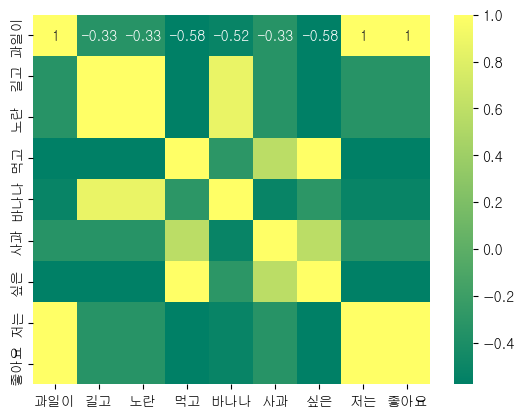

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Gulim')
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.show()

In [ ]:
txt = ['저는 사과 좋아요',
'저는 바나나 좋아요',
'저는 바나나 좋아요 저는 바나나 좋아요']

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
value = vec.fit_transform(txt).toarray()
key = vec.get_feature_names_out()

df = pd.DataFrame(value, columns=key)
df

,바나나,사과,저는,좋아요
0,0,1,1,1
1,1,0,1,1
2,2,0,2,2


In [ ]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return round(dot(A, B) / (norm(A) * norm(B)), 2)

In [ ]:
print('문서0, 문서 1:', cos_sim(value[0], value[1]))
print('문서0, 문서 2:', cos_sim(value[0], value[2]))
print('문서1, 문서 2:', cos_sim(value[1], value[2]))

문서0, 문서 1: 0.67
문서0, 문서 2: 0.67
문서1, 문서 2: 1.0


In [ ]:
review1 = '갑자기 규카츠가 땡겨서 리뷰 안보고 들어왔는데 생각보다 맛있어서 기분 좋았어요 매장도 깨끗해서 더 좋았네요 규카츠 먹고싶을때마다 앞으로도 찾아올거 같습니다'
review2 = '고기가 양도많고 맛있었어요 살치살로만 먹었는데 두둑하게 고기먹는 느낌이 좋았어요 불닭볶음면도 별미입니다'
review3 = '고기 너무 부드럽고 냄새 하나도 안나요 익혀먹어도 맛있고 나온 상태 그대로 먹어도 맛있어요 불닭크림도 진짜 맛있습니당'

In [ ]:
reviews = [review1, review2, review3]
reviews

['갑자기 규카츠가 땡겨서 리뷰 안보고 들어왔는데 생각보다 맛있어서 기분 좋았어요 매장도 깨끗해서 더 좋았네요 규카츠 먹고싶을때마다 앞으로도 찾아올거 같습니다',
 '고기가 양도많고 맛있었어요 살치살로만 먹었는데 두둑하게 고기먹는 느낌이 좋았어요 불닭볶음면도 별미입니다',
 '고기 너무 부드럽고 냄새 하나도 안나요 익혀먹어도 맛있고 나온 상태 그대로 먹어도 맛있어요 불닭크림도 진짜 맛있습니당']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

vec = CountVectorizer()
value = vec.fit_transform(reviews).toarray()
key = vec.get_feature_names_out()

df = pd.DataFrame(value, columns=key)
df

,갑자기,같습니다,고기,고기가,고기먹는,규카츠,규카츠가,그대로,기분,깨끗해서,...,안나요,안보고,앞으로도,양도많고,익혀먹어도,좋았네요,좋았어요,진짜,찾아올거,하나도
0,1,1,0,0,0,1,1,0,1,1,...,0,1,1,0,0,1,1,0,1,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1


In [ ]:
print('리뷰0, 리뷰1:', cos_sim(value[0], value[1]))
print('리뷰0, 리뷰2:', cos_sim(value[0], value[2]))
print('리뷰1, 리뷰2:', cos_sim(value[1], value[2]))

리뷰0, 리뷰1: 0.07
리뷰0, 리뷰2: 0.0
리뷰1, 리뷰2: 0.0


In [ ]:
from konlpy.tag import Okt
okt = Okt()
txt = ''.join(reviews)
okt.nouns(txt)
col_name = np.unique(okt.nouns(txt))
col_name

tf(review1, col_name[0])
result=[]
for r in reviews:
    result.append([])
    for c in col_name:
        result[-1].append(tf(r, c))

df = pd.DataFrame(result, columns=col_name)
df

,갑자기,고기,규,그대로,기분,냄새,느낌,더,때,리뷰,...,생각,습,안나,안보,앞,양도,진짜,카츠,크림,하나
0,1,0,2,0,1,0,0,1,1,1,...,1,1,0,1,1,0,0,2,0,0
1,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,1


In [ ]:
print('리뷰0, 리뷰1:', cos_sim(df.iloc[0,:], df.iloc[1,:]))
print('리뷰0, 리뷰2:', cos_sim(df.iloc[0,:], df.iloc[2,:]))
print('리뷰1, 리뷰2:', cos_sim(df.iloc[1,:], df.iloc[2,:]))

리뷰0, 리뷰1: 0.0
리뷰0, 리뷰2: 0.07
리뷰1, 리뷰2: 0.3


In [ ]:
# Word2Vec
import pandas as pd
import numpy as np

df_txt = pd.read_csv('ratings_test.txt', sep='\t', encoding='utf-8')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(df)

150000

In [ ]:
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [ ]:
from konlpy.tag import Okt

okt = Okt()

df.iloc[0,1]
okt.morphs(df.iloc[0,1])
okt.pos(df.iloc[5,1])

## 사용할 형태소의 품사(noun, adjective, adverb)

[('막', 'Noun'),
 ('걸음', 'Noun'),
 ('마', 'Noun'),
 ('뗀', 'Verb'),
 ('3', 'Number'),
 ('세', 'Noun'),
 ('부터', 'Josa'),
 ('초등학교', 'Noun'),
 ('1', 'Number'),
 ('학년', 'Noun'),
 ('생인', 'Noun'),
 ('8', 'Number'),
 ('살용', 'Verb'),
 ('영화', 'Noun'),
 ('.', 'Punctuation'),
 ('ㅋㅋㅋ', 'KoreanParticle'),
 ('...', 'Punctuation'),
 ('별', 'Modifier'),
 ('반개', 'Noun'),
 ('도', 'Josa'),
 ('아까', 'Adjective'),
 ('움', 'Noun'),
 ('.', 'Punctuation')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
df = df.dropna(subset=['document'])

In [ ]:
mor_lst = []

for col in df['document']:
    text = okt.pos(col)
    for txt in text:
        if txt[1]=='Adjective' or txt[1]=='Noun' or txt[1]=='Adverb':
            mor_lst.append(txt[0])

mor_lst

['더빙',
 '진짜',
 '짜증나네요',
 '목소리',
 '흠',
 '포스터',
 '보고',
 '초딩',
 '영화',
 '줄',
 '오버',
 '연기',
 '가볍지',
 '무재',
 '밓었',
 '다그',
 '래서',
 '추천',
 '다',
 '교도소',
 '이야기',
 '구먼',
 '솔직히',
 '재미',
 '없다',
 '평점',
 '조정',
 '몬페',
 '의',
 '익살스런',
 '연기',
 '영화',
 '스파이더맨',
 '커스틴',
 '던스트',
 '너무나도',
 '이뻐',
 '막',
 '걸음',
 '마',
 '세',
 '초등학교',
 '학년',
 '생인',
 '영화',
 '반개',
 '아까',
 '움',
 '원작',
 '긴장감',
 '제대로',
 '별',
 '반개',
 '아깝다',
 '욕',
 '이응경',
 '길용우',
 '생활',
 '년',
 '정말',
 '발',
 '해도',
 '그것',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '없다',
 '연기',
 '사람',
 '네',
 '액션',
 '없는데도',
 '재미',
 '있는',
 '몇',
 '안되는',
 '영화',
 '왜케',
 '평점',
 '낮은건데',
 '꽤',
 '볼',
 '데',
 '헐리우드',
 '화려함에만',
 '너무',
 '있나',
 '걍',
 '인피니트',
 '짱',
 '진짜',
 '볼때',
 '향수',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '울면',
 '손',
 '횡단보도',
 '때',
 '뻔',
 '이범수',
 '연기',
 '드럽게',
 '담백하고',
 '깔끔해서',
 '좋다',
 '로만',
 '자꾸',
 '그',
 '사람',
 '것',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내생',
 '극장',
 '영화',
 '가장',
 '노잼',
 '노',
 '감동',
 '임',
 '스토리',
 '어거지',
 '감동',
 '어거지',
 '냥',
 '매번',
 '긴장',
 '재밋음',
 '사람',
 '바

In [ ]:
len(mor_lst)

1130792

In [ ]:
def tokenizer(txt):
    tokens_ko = okt.nouns(txt)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = df_txt.iloc[:30000, :]

tfidf_vec = TfidfVectorizer(tokenizer=tokenizer, min_df=10) # min_df는 나와야하는 개수 기준
tfidf_matrix = tfidf_vec.fit_transform(df['document'])
tfidf_matrix

<30000x2205 sparse matrix of type '<class 'numpy.float64'>'
	with 137659 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame(tfidf_matrix.toarray())

In [ ]:
df.iloc[0,:].sort_values(ascending=False)

695     0.671227
449     0.636976
1801    0.379097
1480    0.000000
1481    0.000000
          ...   
730     0.000000
729     0.000000
728     0.000000
727     0.000000
2204    0.000000
Name: 0, Length: 2205, dtype: float64

In [ ]:
col_name = tfidf_vec.get_feature_names_out()

In [ ]:
col_name[[695,449,1801]]

array(['목소리', '더빙', '진짜'], dtype=object)

In [ ]:
# 10개 데이터에서 최대 tf-idf인 단어 찾기
df_10 = df.iloc[1000:1010, :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top>0].index
    if len(top3) > 3:
        top3 = top3[:3]
    print(df_txt.iloc[1000+i, 1]) # 실제 코멘트
    print(col_name[top3]) # 해당 코멘트의 핵심 단어

정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그자체네요
['왕자' '성인' '다른']
이영화만 성공 했어도 스퀘어가 에닉스랑 합병 할일은 없었을텐데..
['성공' '일' '이영화']
울컥하는 사회현실 ㅠㅠ
['사회' '현실']
기대를하나도안하면 할일없을때보기좋은영화
['도안' '일' '기대']
소림사 관문 통과하기 진짜 어렵다는거 보여준 영화..극장에서 개봉하는거 반갑다..
['극장' '개봉' '진짜']
시리즈안나오나 ㅠㅠㅠㅠㅠㅠㅠㅠ
['시리즈']
끝난다는 사실이 너무 슬퍼요. 가슴이 뻥 뚫려버린것같아..
['뻥' '사실' '가슴']
펑점조절
['조절']
와..이건진짜 으리으리한데..?
['으리' '데' '이건']
손발이 오그라드네요..................
['손발']


In [ ]:
df_txt.dropna(inplace=True)
df_txt[df_txt['document'].str.contains('아까운')]

,id,document,label
353,9831680,돈과 시간이 아까운 영화,0
471,9990660,시나리오 연출 연기 어느것 하나 갖추지 못한 시간이 넘 아까운 억지 싸구려 중국 신...,0
647,5812647,진짜 퀵이유로 이렇게 어이없고 재미없는영화는 처음입니다 진짜 돈아까운적은 두번째라,0
715,8098523,1점도 아까운 쓰레기영화 전작이 아까움,0
950,9444015,근 5년동안 본 모든영화 통틀어서 최악의영화..시간이 남아돌때 봐도 시간이 아까운 ...,0
...,...,...,...
148746,10156693,1점도 아까운데 0.5점이 없네요.ㅎㅎ,0
148850,8041995,컴퓨터 전기세가 아까운 쓰레기 한쿡영화!,0
149713,6674102,정말 댓글에 속아서 보게된 시간 아까운 영화. 전체적으로 코믹적인 요소를 많이 넣으...,0
149863,5900962,시간 아까운 영화,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc[[353],:], df.loc[[1135],:]))
print(df_txt.loc[353, 'document'])
print(df_txt.loc[1135,'document'])

[[0.7116726]]
돈과 시간이 아까운 영화
보는 시간조차 아까운 영화...


In [ ]:
# 10개 데이터에서 최대 tf-idf인 단어 찾기
df_10 = df.iloc[[353,1135], :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top>0].index
    if len(top3) > 3:
        top3 = top3[:3]
    print(df_txt.iloc[df_10.index[i], 1]) # 실제 코멘트
    print(col_name[top3]) # 해당 코멘트의 핵심 단어

돈과 시간이 아까운 영화
['돈' '시간' '영화']
보는 시간조차 아까운 영화...
['시간' '영화']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df.loc[[1628],:], df.loc[[1868],:]))
print(df_txt.loc[1628, 'document'])
print(df_txt.loc[1868,'document'])

[[0.36141015]]
1점도 아까운영화단1도 안무서움
1점도 아까운... 영화라고 말하는게 부끄러운


In [ ]:
# 10개 데이터에서 최대 tf-idf인 단어 찾기
df_10 = df.iloc[[1628,1868], :]
for i in range(len(df_10)):
    top = df_10.iloc[i, :].sort_values(ascending=False)
    top3 = top[top>0].index
    if len(top3) > 3:
        top3 = top3[:3]
    print(df_txt.iloc[df_10.index[i], 1]) # 실제 코멘트
    print(col_name[top3]) # 해당 코멘트의 핵심 단어

1점도 아까운영화단1도 안무서움
['무서움' '점도' '도']
1점도 아까운... 영화라고 말하는게 부끄러운
['점도' '말' '영화']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df, df_txt.iloc[:30000,-1],
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.7377777777777778


In [ ]:
n = 600
idx = y_test.index[n]
print(df_txt.iloc[idx,1])
print('해당 리뷰의 Label : ', df_txt.iloc[idx, -1], '예측된 Label : ', pred[n])

오글거리고 유치하고 완전최악이었음...
해당 리뷰의 Label :  0 예측된 Label :  0
